In [8]:
import json
import os
import pandas as pd

In [9]:
print(os.listdir('../results'))

['attention_maps', '.ipynb_checkpoints', 'embedding_seed_0_image_eval_dev_predictions.json', 'lstm_seed_0_image_eval_dev_predictions.json', 'clip_seed_0_image_eval_dev_predictions.json']


In [35]:
n_seeds = 3
results = []

# embedding evaluation
for i in range(n_seeds):
    with open(f'../results/embedding_seed_{i}_image_eval_dev_predictions.json') as f:
        data = json.load(f)
    
    embedding_result = pd.DataFrame(data["data"])

    # add additional columns
    embedding_result['model'] = 'embedding'
    embedding_result['target_category'] = embedding_result['categories'].str[0]
    results.append(embedding_result)
    
# lstm evaluation
for i in range(n_seeds):
    with open(f'../results/lstm_seed_{i}_image_eval_dev_predictions.json') as f:
        data = json.load(f)
    
    lstm_result = pd.DataFrame(data["data"])

    # add additional columns
    lstm_result['model'] = 'lstm'
    lstm_result['target_category'] = lstm_result['categories'].str[0]
    results.append(lstm_result)
    
# clip evaluation
with open('../results/clip_seed_0_image_eval_dev_predictions.json') as f:
    data = json.load(f)
    
clip_results = pd.DataFrame(data["data"])
clip_results['model'] = 'clip'
clip_results['target_category'] = clip_results['categories'].str[0]
results.append(clip_results)

In [55]:
results_df = pd.concat(results)
eval_results = results_df.groupby(['model', 'target_category', 'seed']).mean('correct').reset_index()
print(eval_results)

    model target_category  seed  trial_idx  pred  correct
0    clip            ball     0       49.5  0.99     0.49
1    clip          basket     0      149.5  0.48     0.78
2    clip             car     0      249.5  0.22     0.88
3    clip             cat     0      349.5  0.27     0.85
4    clip           chair     0      449.5  0.76     0.62
..    ...             ...   ...        ...   ...      ...
149  lstm             toy     1     2049.5  1.10     0.45
150  lstm             toy     2     2049.5  1.19     0.37
151  lstm          window     0     2149.5  0.84     0.55
152  lstm          window     1     2149.5  0.75     0.58
153  lstm          window     2     2149.5  0.93     0.51

[154 rows x 6 columns]


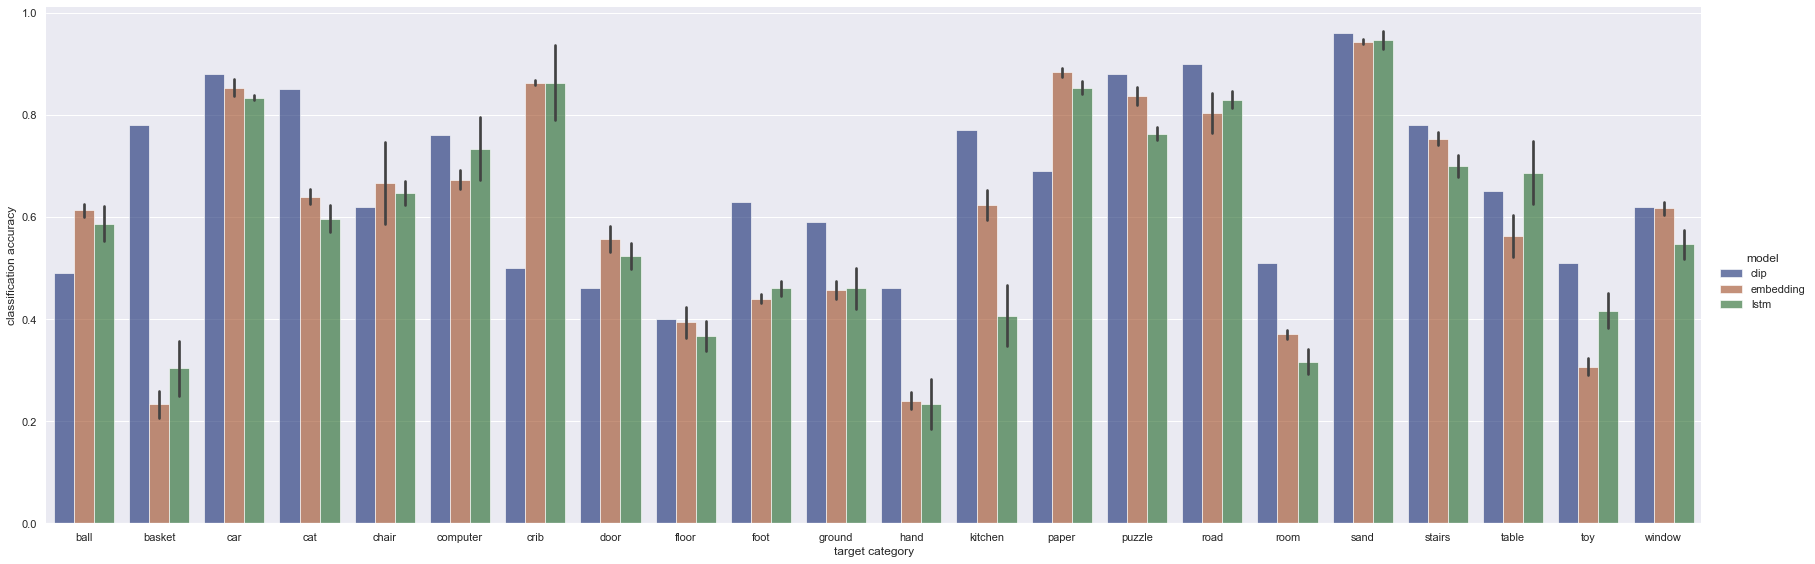

In [64]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(5,100)})

g = sns.catplot(
    data=eval_results, kind="bar",
    x="target_category", y="correct", hue="model",
    ci="sd", palette="dark", alpha=.6, height=8, aspect=3
)
g.despine(left=True)
g.set_axis_labels("target category", "classification accuracy")